In [105]:
#experimental datasets

patch_1_mig15_replicate_1 = [12, 93, 113, 5, 76, 1, 19, 108, 40, 127, 83, 15, 32, 1, 104, 16, 24, 113, 6, 62, 1, 97, 2, 48, 0, 0]
patch_2_mig15_replicate_1 = [16, 9, 90, 7, 53, 9, 15, 23, 82, 22, 77, 18, 73, 1, 107, 28, 50, 122, 0, 0, 133, 25, 60, 110, 5, 47]

patch_1_mig15_replicate_2 = [14, 5, 22, 19, 48, 7, 52, 6, 32, 7, 68, 46, 34, 77, 55, 61, 3, 0, 18, 1, 66, 1, 54, 24, 106, 6]
patch_2_mig15_replicate_2 = [17, 12, 47, 13, 66, 2, 21, 0, 0, 62, 2, 52, 1, 26, 49, 35, 4, 40, 19, 68, 1, 64, 15, 79, 7, 83]

patch_1_mig15_replicate_3 = [13, 5, 65, 4, 18, 8, 99, 7, 102, 19, 26, 6, 35, 0, 90, 14, 108, 3, 37, 6, 26, 21, 147, 3, 65, 0]
patch_2_mig15_replicate_3 = [18, 15, 31, 7, 65, 8, 99, 3, 88, 10, 25, 19, 45, 2, 107, 13, 110, 8, 136, 7, 18, 3, 96, 3, 0, 127]

patch_1_mig15_replicate_4 = [17, 18, 59, 3, 14, 122, 8, 80, 3, 38, 19, 96, 3, 19, 46, 92, 6, 0, 72, 5, 116, 7, 95, 6, 119, 11]
patch_2_mig15_replicate_4 = [19, 6, 98, 1, 0, 49, 10, 68, 19, 96, 12, 98, 6, 83, 34, 98, 3, 27, 20, 94, 6, 71, 62, 4, 13, 90]




In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as stats
import itertools as it
import math 
import pandas as pd
import random as random

In [107]:
##define the fixed parameters
hatchability = 0.98  #if hatchability is density (egg or adult) depedent, then define it in the pre-adult-module or the adult-module functions 
x1 = 2.5  #parameter in finding the mean larval size
x2 = 1  #parameter in finding the mean larval size 
x3 = 0.009 #parameter in finding the mean larval size 
sigma_size = 0.45  #parameter in assigning larval sizes by drawing from a normal distribution
mc = 1.1 #critical size cut off of the larval stage for successful pupation (= 1.1 (JB) and 1 (FEJ))
x4 = 1.0  #parameter in finding the adult sizes
female_proportion = 0.5 #assign sex to the adutls 
x5 = 85 #parameter in finding fecundity
x6 = 2  #parameter in finding fecundity
sen_adsize = 1.7 #parameter related to sensivity of fecundity to adult size
sen_adden = 0.17 #parameter related to sensivity of fecundity to adult denisity

food = 1.76


In [108]:
f = 0.15  #migration rate

In [109]:
#assigning sizes to the adults 

def generating_females_size_array(number_of_females):
    assumed_number_of_adults = 2*number_of_females
    number_of_larvae_assumption = int(assumed_number_of_adults/0.85) #average simulated surviorship of eggs 0 to 200 (check test temp file)

    mean_size = x1*(1-1/(x2+np.exp(-x3*number_of_larvae_assumption+food)))

    #same mean size as the larval stage function

    distribution_of_female_sizes = abs(np.random.normal(mean_size, sigma_size, 10*number_of_females))      #make a large distribution of female sizes
    distribution_of_female_sizes_above_mc = x4*distribution_of_female_sizes[distribution_of_female_sizes>=mc] #choose only the ones above mc


    randomly_chosen_female_size_distribution = random.sample(distribution_of_female_sizes_above_mc.tolist(), number_of_females)
    #out of the large array pick the required number of females
    return np.array(randomly_chosen_female_size_distribution)


test1 = generating_females_size_array(10)
test2 = generating_females_size_array(20)

In [110]:
##Migration function for 2 patches
# female size arrays are needed (can't be removed)



def Migration(numadult1,numadult2,size_female_arr1,size_female_arr2):

    mig_female_12 = size_female_arr1[(len(size_female_arr1)-round(f*numadult1/2)):]
    mig_female_21 = size_female_arr2[(len(size_female_arr2)-round(f*numadult2/2)):]
    size_female_arr1 = np.concatenate((size_female_arr1[0:(len(size_female_arr1)-round(f*numadult1/2))],mig_female_21))
    size_female_arr2 = np.concatenate((size_female_arr2[0:(len(size_female_arr2)-round(f*numadult2/2))],mig_female_12))
    numadult1 = numadult1 - round(f*numadult1/2) + round(f*numadult2/2)
    numadult2 = numadult2 - round(f*numadult2/2) + round(f*numadult1/2)
    return numadult1,numadult2,size_female_arr1,size_female_arr2



In [111]:
#now female will lay eggs (according to adult module)

##Adult-Module
#adnut = #adult food nutrition quality; 1 (LL and HL), 1.29 (HH) and 1.49 (LH)

adnut = 1


def Adult_Module(numadult,size_female_arr):

    #assumption that number of adult is twice the number of females
    

    addens_ind_fec_arr = adnut*x5*np.log(x6+sen_adsize*size_female_arr)
    addens_eff = 1/(1+sen_adden*numadult)
    fecundity_arr = addens_eff*addens_ind_fec_arr
    fecundity_arr = fecundity_arr.astype(int)
    numegg = fecundity_arr.sum()
    return numegg


#out of eggs use pre-adult module to get number of adults

##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 

def Pre_Adult_Module(numegg):

    numlarva = int(hatchability*numegg)
    mean_size = x1*(1-1/(x2+np.exp(-x3*numlarva+food)))
    size_larva_arr = abs(np.random.normal(mean_size, sigma_size, numlarva))
    numadult = (size_larva_arr>=mc).sum()
    # size_adult_arr = x4*size_larva_arr[size_larva_arr>=mc]
    return numadult



In [112]:
#simulation takes the current patch 1 exp population (both patches) from experiments as input and gives the next generatuion population as output (both pathces agin)


def simulatuted_next_generation(patch_1_population_current_generation, patch_2_population_current_generation):

    #first do the migration between patches (datasheet has post-census data)

    #Assumption number of females is half of number of adults

    number_of_females_patch_1 = round(patch_1_population_current_generation/2)
    number_of_females_patch_2 = round(patch_2_population_current_generation/2)

    
    #assigning sizes to females of both patches

    patch_1_size_array_pre_migration = generating_females_size_array(number_of_females_patch_1)
    patch_2_size_array_pre_migration = generating_females_size_array(number_of_females_patch_2)

    

    #performing migration between patches

    patch_1_population_post_migration, patch_2_population_post_migration, patch_1_size_array_post_migration, patch_2_size_array_post_migration = Migration(patch_1_population_current_generation, patch_2_population_current_generation, patch_1_size_array_pre_migration, patch_2_size_array_pre_migration)

    #adults of both patches lay eggs

    patch_1_number_of_eggs = Adult_Module(patch_1_population_post_migration, patch_1_size_array_post_migration)
    patch_2_number_of_eggs = Adult_Module(patch_2_population_post_migration, patch_2_size_array_post_migration)

    #from egg to adult in both patches

    next_generation_patch_1_population = Pre_Adult_Module(patch_1_number_of_eggs)
    next_generation_patch_2_population = Pre_Adult_Module(patch_2_number_of_eggs)

    return next_generation_patch_1_population, next_generation_patch_2_population

    



In [113]:
#error calculation

def error_calculation(patch_1_exp_population, patch_2_exp_population, patch_1_simulated_population, patch_2_simulated_population):
    
        error_patch_1 = abs(patch_1_exp_population - patch_1_simulated_population)
        error_patch_2 = abs(patch_2_exp_population - patch_2_simulated_population)

        average_error = (error_patch_1 + error_patch_2)/2
        return average_error

In [114]:
#given input patch 1 and patch 2, simulate patch 1 and patch 2 of next generation and calculate error

def simulate_and_calculate_error(patch_1_population_current_generation_exp, patch_2_current_generation_exp, patch_1_next_generation_exp, patch_2_next_generation_exp):

    patch_1_next_gen_simulated_population, patch_2_next_gen_simulated_population = simulatuted_next_generation(patch_1_population_current_generation_exp,patch_2_current_generation_exp)

    error = error_calculation(patch_1_next_generation_exp, patch_2_next_generation_exp, patch_1_next_gen_simulated_population, patch_1_next_gen_simulated_population)

    return error




In [115]:
#calculate average error between experimental and simulated data

number_of_simulations_to_calculate_avg_error_between_exp_and_simul = 5
def average_error_calculation(patch_1_population_current_generation_exp, patch_2_current_generation_exp, patch_1_next_generation_exp, patch_2_next_generation_exp):

    error_array = np.zeros(number_of_simulations_to_calculate_avg_error_between_exp_and_simul)

    for i in range(number_of_simulations_to_calculate_avg_error_between_exp_and_simul):
        error_array[i] = simulate_and_calculate_error(patch_1_population_current_generation_exp, patch_2_current_generation_exp, patch_1_next_generation_exp, patch_2_next_generation_exp)

    average_error = error_array.mean()
    print(average_error)
    return average_error


In [116]:
#from time series data generate tuples in format (current_gen_exp_patch_1, current_gen_exp_patch_2, next_gen_exp_patch_1, next_gen_exp_1_patch_2)

def generate_tuples_from_time_series_data(patch_1_time_series_data, patch_2_time_series_data):

    population_tuples = []
    
    for i in range(len(patch_1_time_series_data)-1):
        current_gen_exp_patch_1 = patch_1_time_series_data[i]
        current_gen_exp_patch_2 = patch_2_time_series_data[i]
        next_gen_exp_patch_1 = patch_1_time_series_data[i+1]
        next_gen_exp_patch_2 = patch_2_time_series_data[i+1]

        population_tuples.append((current_gen_exp_patch_1, current_gen_exp_patch_2, next_gen_exp_patch_1, next_gen_exp_patch_2))

    return population_tuples



In [117]:
#make combined tuple list from time series data of replicate 1-3

tuple_list_replicate_1 = generate_tuples_from_time_series_data(patch_1_mig15_replicate_1, patch_2_mig15_replicate_1)
tuple_list_replicate_2 = generate_tuples_from_time_series_data(patch_1_mig15_replicate_2, patch_2_mig15_replicate_2)
tuple_list_replicate_3 = generate_tuples_from_time_series_data(patch_1_mig15_replicate_3, patch_2_mig15_replicate_3)

combined_tuple_list = tuple_list_replicate_1 + tuple_list_replicate_2 + tuple_list_replicate_3

#tuple list for replicate 4 (which will be used for testing)
tuple_list_replicate_4 = generate_tuples_from_time_series_data(patch_1_mig15_replicate_4, patch_2_mig15_replicate_4)



In [118]:
#find root mean square error for the combined tuple list

def root_mean_square_error_combined_tuple_list(combined_tuple_list):
    error_list_all_gens = np.zeros(len(combined_tuple_list))
    for i in range(len(combined_tuple_list)):
        error_list_all_gens[i] = average_error_calculation(combined_tuple_list[i][0], combined_tuple_list[i][1], combined_tuple_list[i][2], combined_tuple_list[i][3])
    rmse = np.sqrt(np.mean(np.square(error_list_all_gens)))

    print(food, adnut, rmse, "food,adnut,rmse for given run")
    return rmse



In [119]:
#change parameters and minimise RMSE

#  4 values of food × 29 sen_adden × 10 sen_adsize × 7 adnut =  8,120 combinations
# the number of individual parameters (low like 8 or high like 58) has been decided based on the importance of the parameter in affecting the dynamics


food_arr = np.arange(.16,2.76,0.4) # 4 values
sen_adden_arr = np.arange(0.01,0.59,0.02) # 29 values
sen_adsize_arr = np.arange(0.2,2.2,0.2) # 10 values
adnut_arr = np.arange(1.07,2.05,0.14) # 7 values


# create all possible combinations of the above parameters
from itertools import product
parameters = [food_arr,sen_adden_arr,sen_adsize_arr,adnut_arr]
combinations = list(product(*parameters))


print(combinations)



[(0.16, 0.01, 0.2, 1.07), (0.16, 0.01, 0.2, 1.21), (0.16, 0.01, 0.2, 1.3499999999999999), (0.16, 0.01, 0.2, 1.4899999999999998), (0.16, 0.01, 0.2, 1.6299999999999997), (0.16, 0.01, 0.2, 1.7699999999999996), (0.16, 0.01, 0.2, 1.9099999999999995), (0.16, 0.01, 0.4, 1.07), (0.16, 0.01, 0.4, 1.21), (0.16, 0.01, 0.4, 1.3499999999999999), (0.16, 0.01, 0.4, 1.4899999999999998), (0.16, 0.01, 0.4, 1.6299999999999997), (0.16, 0.01, 0.4, 1.7699999999999996), (0.16, 0.01, 0.4, 1.9099999999999995), (0.16, 0.01, 0.6000000000000001, 1.07), (0.16, 0.01, 0.6000000000000001, 1.21), (0.16, 0.01, 0.6000000000000001, 1.3499999999999999), (0.16, 0.01, 0.6000000000000001, 1.4899999999999998), (0.16, 0.01, 0.6000000000000001, 1.6299999999999997), (0.16, 0.01, 0.6000000000000001, 1.7699999999999996), (0.16, 0.01, 0.6000000000000001, 1.9099999999999995), (0.16, 0.01, 0.8, 1.07), (0.16, 0.01, 0.8, 1.21), (0.16, 0.01, 0.8, 1.3499999999999999), (0.16, 0.01, 0.8, 1.4899999999999998), (0.16, 0.01, 0.8, 1.62999999999

The RMSE error around 45-50 irrespetcive of parameter comination. I have a feeling there is a bug in the code

In [120]:
# store the combination and the RMSE function in a 2D array

combn_RMSE_funcn_arr = np.zeros([len(combinations),5]) # 1st column is food, 2nd column is sen_adden, 3rd column is sen_adsize, 4th column is adnut, 5th column is RMSE function
for i in range(len(combinations)):
    food = combinations[i][0]
    sen_adden = combinations[i][1]
    sen_adsize = combinations[i][2]
    adnut = combinations[i][3]

    combn_RMSE_funcn_arr[i,0] = food
    combn_RMSE_funcn_arr[i,1] = sen_adden
    combn_RMSE_funcn_arr[i,2] = sen_adsize
    combn_RMSE_funcn_arr[i,3] = adnut
    
    # combn_RMSE_funcn_arr[i,4] = root_mean_square_error_combined_tuple_list(combined_tuple_list)


# store the RMSE function array in a csv file


# np.savetxt(f"RMSE_function_array.csv",combn_RMSE_funcn_arr,delimiter=",") 

        

In [121]:
np.savetxt(f"RMSE_function_array.csv",combn_RMSE_funcn_arr,delimiter=",") 


In [122]:
# read the cost function array from the csv file
# find the combination with the lowest RMSE  

# use that combination to do evaluate how well it is doing first on the test experimental data (replicate4)

    # read the cost function array from the csv file
RMSE_function_array = np.loadtxt(f"RMSE_function_array.csv",delimiter=",")
min_rmse_index = np.argmin(RMSE_function_array[:,4])
minimum_RMSE = np.min(RMSE_function_array[:,4])

print(min_rmse_index, minimum_RMSE)
optimum_params = RMSE_function_array[min_rmse_index,0:4]

print(optimum_params)

# use that combination to do evaluate how well it is doing first on the test experimental data (replicate4)


0 0.0
[0.16 0.01 0.2  1.07]


In [123]:
# use the combination to do evaluate how well it is doing first on the test experimental data (rmse of optimum parameters on replicate4)

food = optimum_params[0]
sen_adden = optimum_params[1]
sen_adsize = optimum_params[2]
adnut = optimum_params[3]

print(food, sen_adden, sen_adsize, adnut) #checking if the parameters are correct

# calculate the rmse of the optimum parameters on replicate4
rmse_optimum_params_replicate4 = root_mean_square_error_combined_tuple_list(tuple_list_replicate_4)

print(rmse_optimum_params_replicate4)

0.16 0.01 0.2 1.07
0.16 1.07 46.26608693200669 food,adnut,rmse for given run
46.26608693200669


RMSE is horrible here - the error on avaergge error is 40. since even the trainung test had shit error. I should probably plot the simulation time serie once to try and understand where it is going wrong. Or some other charctersistic like aveega error. Will give me a very good idea ig

I think adnut has to be a factor, because it was did not reach intensely, or maybe stochasicty is low
I realise it isn't a complete blackbox - I might be able to arrive at some intution

I just changed food and adnut coz that seemed more intutve
also realised - senistuggg ol desty means the error of takn is less a


I can test this by printing out parameter values for a small set. First I will make it into a class, will make life easier. 
 



In [135]:
#trying for a wider parameter range if getting a low RMSE is even possible
#change parameters and minimise RMSE



food_arr = np.arange(0.4, 3, 0.1)

# create all possible combinations of the above parameters
from itertools import product
parameters_wide = [food_arr]
combinations_wide = list(product(*parameters_wide))



combinations_wide_RMSE_funcn_arr = np.zeros([len(combinations_wide),3]) # 1st column is food, 2nd column is sen_adden, 3rd column is sen_adsize, 4th column is adnut, 5th column is RMSE function
for i in range(len(combinations_wide)):
    food = combinations_wide[i][0]
    # adnut = combinations_wide[i][1]

    
    combinations_wide_RMSE_funcn_arr[i,0] = food
    # combinations_wide_RMSE_funcn_arr[i,1] = adnut
    
    combinations_wide_RMSE_funcn_arr[i,2] = root_mean_square_error_combined_tuple_list(combined_tuple_list)

print(combinations_wide_RMSE_funcn_arr)
# store the RMSE function array in a csv file
# np.savetxt(f"combinations_wide_RMSE_funcn_arr.csv",combinations_wide_RMSE_funcn_arr,delimiter=",") 


0.4 1.5 44.61291741188868 food,adnut,rmse for given run
0.5 1.5 44.69224988742455 food,adnut,rmse for given run
0.6 1.5 44.669182516212075 food,adnut,rmse for given run
0.7 1.5 44.15531225118898 food,adnut,rmse for given run
0.7999999999999999 1.5 44.420456248594895 food,adnut,rmse for given run
0.8999999999999999 1.5 43.71592997218901 food,adnut,rmse for given run
0.9999999999999999 1.5 44.3046468593683 food,adnut,rmse for given run
1.0999999999999999 1.5 44.03220488082179 food,adnut,rmse for given run
1.1999999999999997 1.5 43.6026711719974 food,adnut,rmse for given run
1.2999999999999998 1.5 43.898378102157714 food,adnut,rmse for given run
1.4 1.5 44.0344032168788 food,adnut,rmse for given run
1.4999999999999996 1.5 44.52326283341477 food,adnut,rmse for given run
1.5999999999999996 1.5 44.445122717046615 food,adnut,rmse for given run
1.6999999999999997 1.5 45.061367045397105 food,adnut,rmse for given run
1.7999999999999998 1.5 45.814779274814796 food,adnut,rmse for given run
1.89999

In [ ]:
#plot experiment vs simulation time series box plot data for the optimum parameters (first three patches)
#plot experiment vs simulation time series box plot data for the optimum parameters (test data


#simulate time series from these optimum parameters. 
# Calculate mean, coefficient of varaiance, FI, autocorr1, autocorr2. Compare experiment vs simulation for these statistics

[15, 37, 27, 205, 39, 108, 17, 33, 22, 39, 37, 11, 26, 0, 44, 17, 16, 33, 215, 23, 17, 34, 21, 31, 0, 77]
[6, 7, 34, 193, 22, 218, 13, 23, 34, 30, 28, 16, 26, 0, 41, 11, 23, 47, 0, 19, 30, 21, 22, 48, 203, 32]


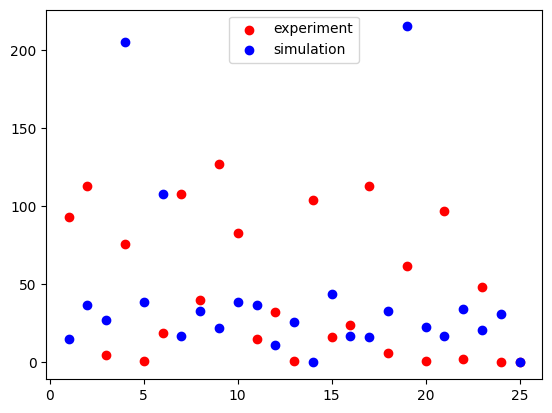

In [152]:
#take replicate 1, (patch 1 and 2) data. Use generation 1 to 24
#find out simulated generation 2 to 25
#take 2 to 24 from both - plot a scatter plot
patch_1_simulated_population = []
patch_2_simulated_population = []

for i, j in zip(patch_1_mig15_replicate_1, patch_2_mig15_replicate_1):
    # print(i, j)
    next_genpatch1, next_genpatch2 = simulatuted_next_generation(i,j)
    patch_1_simulated_population.append(next_genpatch1)
    patch_2_simulated_population.append(next_genpatch2)

print(patch_1_simulated_population)
print(patch_2_simulated_population)

generations = np.arange(1,26,1)
plt.scatter(generations, patch_1_mig15_replicate_1[1:], color = "red")
plt.scatter(generations, patch_1_simulated_population[:-1], color = "blue")
plt.legend(["experiment", "simulation"])